In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D
import matplotlib.image as img
from PIL import Image

# Importing and Processing Data

In [2]:
mnist = tf.keras.datasets.mnist

Below, we split the entire MNIST dataset into a training set and a testing set, as per the standard machine learning procedure.

In [3]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [4]:
print(train_labels)
print(type(train_images))

[5 0 4 ... 5 6 8]
<class 'numpy.ndarray'>


In [5]:
train_images.shape

(60000, 28, 28)

The shape above, (60000, 28, 28), represents 60000 training images with each image having a size of 28 by 28.

In [6]:
train_images # Matrix of Pixel Intensities

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

Below, we plot the first ten training images:

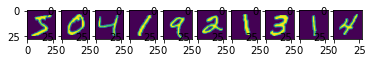

In [7]:
for i in range(10):
  im = Image.fromarray(train_images[i])
  plt.subplot(1,10,i+1)
  plt.imshow(im)

# Building and Compiling the Model

We now build and compile our model architecture in Keras. Our model will have three layers, a single Flatten layer and two Dense layers with relu and softmax activations. 

In [8]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
    ])

In [9]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Training the Model

In [10]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/backend.py:4930: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`sparse_categorical_crossentropy` received `from_logits=True`, but '


1875/1875 [==============================] - 4s 2ms/step - loss: 2.6924 - accuracy: 0.8497
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4021 - accuracy: 0.9072
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2977 - accuracy: 0.9266
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2465 - accuracy: 0.9383
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2259 - accuracy: 0.9438
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2122 - accuracy: 0.9471
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2054 - accuracy: 0.9503
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1876 - accuracy: 0.9532
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1895 - accuracy: 0.9554
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1734 - accurac

We see from the result at Epoch 10/10 that the training accuracy was 0.9586. In other words, 95.86% of the training images were correctly classified.

# Testing the Model on the Test Set

In [11]:
test_images.shape

(10000, 28, 28)

Since there were 10,000 images in the test set each of size 28 by 28, we obtained a shape of (10000, 28, 28).

In [12]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [13]:
pred_test_images = model.predict(test_images)
pred_test_images

array([[1.0630431e-35, 3.5530142e-21, 1.0655950e-16, ..., 1.0000000e+00,
        2.1131826e-16, 1.3758045e-22],
       [1.6728232e-07, 7.2671343e-03, 9.8971683e-01, ..., 2.3332301e-03,
        6.9763817e-05, 6.6391378e-26],
       [6.2427745e-21, 9.9999928e-01, 3.8792219e-10, ..., 3.3758946e-12,
        1.7100634e-08, 1.0652372e-11],
       ...,
       [7.2236890e-33, 9.6132232e-19, 3.0989507e-26, ..., 3.0101954e-15,
        3.5291987e-14, 1.6586467e-12],
       [1.5174678e-20, 0.0000000e+00, 0.0000000e+00, ..., 4.5264582e-25,
        9.9961128e-23, 3.4595983e-25],
       [2.6383041e-12, 3.8526412e-22, 3.5816470e-13, ..., 9.5267570e-23,
        2.6541536e-11, 1.6831131e-15]], dtype=float32)

In [14]:
pred_test_images.reshape(10000,10)

array([[1.0630431e-35, 3.5530142e-21, 1.0655950e-16, ..., 1.0000000e+00,
        2.1131826e-16, 1.3758045e-22],
       [1.6728232e-07, 7.2671343e-03, 9.8971683e-01, ..., 2.3332301e-03,
        6.9763817e-05, 6.6391378e-26],
       [6.2427745e-21, 9.9999928e-01, 3.8792219e-10, ..., 3.3758946e-12,
        1.7100634e-08, 1.0652372e-11],
       ...,
       [7.2236890e-33, 9.6132232e-19, 3.0989507e-26, ..., 3.0101954e-15,
        3.5291987e-14, 1.6586467e-12],
       [1.5174678e-20, 0.0000000e+00, 0.0000000e+00, ..., 4.5264582e-25,
        9.9961128e-23, 3.4595983e-25],
       [2.6383041e-12, 3.8526412e-22, 3.5816470e-13, ..., 9.5267570e-23,
        2.6541536e-11, 1.6831131e-15]], dtype=float32)

In [15]:
preds = np.argmax(pred_test_images, axis=1)
preds

array([7, 2, 1, ..., 4, 5, 6])

In [16]:
print('Test Accuracy Score:', np.mean(preds == test_labels))

Test Accuracy Score: 0.9516


The result above tells us that the testing accuracy was 0.9516, slightly lower than the training accuracy. In other words, 95.16% of the testing images were correctly classified.